In [ ]:
  from pandas.io.sql import to_sql
  import math
  import pandas as pd
  import statsmodels.api as sm
  import matplotlib.pyplot as plt


ts=pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%208/time_series_example_arima_exog_moving.csv")

In [ ]:
train_portion = 0.8
train_rows = math.floor(len(ts) * train_portion)
train=ts[:train_rows]
test=ts[train_rows:]

In [ ]:
model = sm.tsa.statespace.SARIMAX(
    train["value"],
    order = (0,1,1),
    seasonal_order = (0,1,1,90),
    exog=train["exog"]
)
results = model.fit()

KeyboardInterrupt: ignored

In [ ]:
pred=results.predict(start = test.index[0],end=test.index[-1],exog=test["exog"])

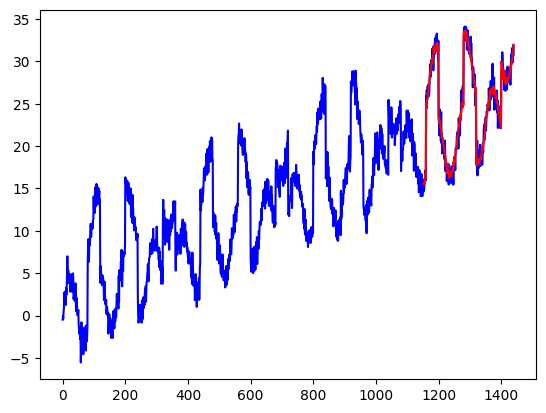

In [ ]:
plt.plot(ts["value"],color="blue",label="actuals")
plt.plot(pred,color="red",label="predicted")

In [ ]:
pip install mysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp39-cp39-linux_x86_64.whl size=107592 sha256=fe66944b3150b6348e27d5d01a52015bc8eebf74e8884ff1a6a9ff69683b9122
  Stored in directory: /root/.cache/pip/wheels/f3/a5/27/c6312d8008951cfd5511684378a9e057b82006c70e1fea6107
Successfully built mysqlclient


In [ ]:
pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp39-cp39-linux_x86_64.whl size=249472 sha256=8a988100cfd9c46a4895fc25a3d0c5a16941ea06c77193a5bc3e2596634829d3
  Stored in directory: /root/.cache/pip/wheels/64/06/5b/ef9543936a3f5de15b02775b6ae548a09f3ed2319d20342771
Successfully built mysql-connector-python-rf


In [ ]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 13.9 MB/s eta 0:00:00


In [ ]:
class Credentials:
    def __init__(self):
        self.user = "bootcamp_student"
        self.password = "goodRobot1"
        self.host ="107.180.55.15"
        self.port = 3306
        self.database = "data_bootcamp"

In [ ]:
class Connection:
    def __init__(self,host,user,password,database):
        self.host= host
        self.user=user
        self.password=password
        self.database=database

    def connection(self):
        from mysql.connector import connect

        return connect(
            host = self.host,
            user=self.user,
            password= self.password,
            database = self.database
        )

creds = Credentials()
x= Connection(creds.host,creds.user,creds.password,creds.database)
con = x.connection()

In [ ]:
class Read:
    def __init__(self, query_string,credentials):
        self.query_string=query_string
        self.credentials=credentials

    def get_data(self):
        con=Connection(
            host = self.credentials.host,
            user=self.credentials.user,
            password= self.credentials.password,
            database = self.credentials.database
        )

        raw_result=[]

        with con.connection() as connection:
            with connection.cursor() as cursor:
                cursor.execute(self.query_string)

                raw_result.append([i[0] for i in cursor.description])

                result = cursor.fetchall()
                for row in result:
                    raw_result.append(row)

        # con.close()
        good_result={}
        for i in range(len(raw_result[0])):
            header_name = raw_result[0][i]
            data_col = list(map(lambda x :x[i], raw_result[1:]))
            good_result[header_name] = data_col
        good_result=pd.DataFrame(good_result)

        return good_result

In [ ]:
query_string = "select * from housing;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.5,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000,4,2.5,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000,3,2.5,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.index = df["date"]
df.drop("date", axis = 1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
2014-12-09,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2015-02-25,5631500400,180000,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
2014-12-09,2487200875,604000,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
2015-02-18,1954400510,510000,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,263000018,360000,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
2015-02-23,6600060120,400000,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
2014-06-23,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007


In [ ]:
query_string = "select avg(price) as avg_price, floors from housing group by floors order by floors;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,avg_price,floors
0,442180.6327,1.0
1,558980.6487,1.5
2,648891.1638,2.0
3,1060346.4720,2.5
4,582526.0228,3.0
5,933312.5000,3.5


In [ ]:
df["avg_price"] = df["avg_price"].astype(float)
df["floors"] = df["floors"].astype(float)

<Axes: xlabel='floors', ylabel='avg_price'>

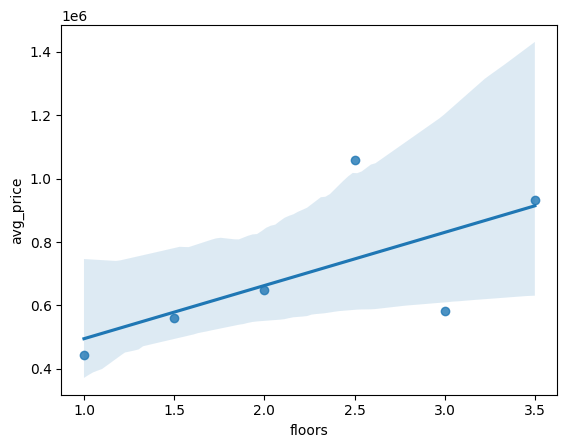

In [ ]:
import seaborn as sns
sns.regplot(data=df, y ="avg_price", x = "floors" )

In [ ]:
query_string = "select avg(price) as avg_price, year(date) as year from housing group by  year(date) order by year(date);"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df .loc[1,"avg_price"] - df .loc[0,"avg_price"]

Decimal('2807.5619')

In [ ]:
query_string = "select * from housing;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.5,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000,4,2.5,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000,3,2.5,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [ ]:
df.index = pd.to_datetime(df["date"])
df.drop("date", axis = 1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
2014-12-09,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2015-02-25,5631500400,180000,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
2014-12-09,2487200875,604000,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
2015-02-18,1954400510,510000,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,263000018,360000,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
2015-02-23,6600060120,400000,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
2014-06-23,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007


<Axes: xlabel='date'>

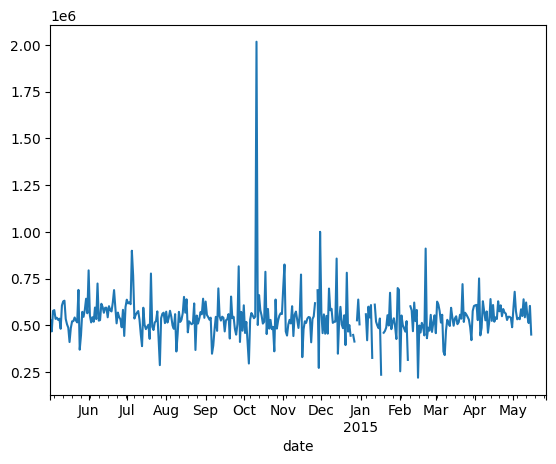

In [ ]:
daily= df.resample("D").mean()
daily["price"].plot()

In [ ]:
query_string = "select * from census;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002294949,-0.193195585,0.381066035,0.582001921,-0.467369163,1.03001491,0.826644188,1.383282148,1.724718052,0.712593724
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091472,-2.91592712,-3.012348815,2.265970561,-2.530798919,7.606015667,-2.626145543,-2.722001942,2.592270321,-2.187333351
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.83296021,17.64729284,21.8457053,19.2432865,17.1978722,15.84417551,18.55962658,22.72762644,20.31714192,18.29349912
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132388,-2.500689528,-7.05682406,-3.904216554,-10.54329881,-4.874741144,-2.75811345,-7.167664228,-3.978582583,-10.54329881
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043032,-5.068870523,-6.201001019,-0.177537116,0.177257822,-5.088388823,-4.363636364,-5.403729459,0.754532745,1.107861384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643038,16.24319928,-5.339773558,-14.25288887,-14.24886378,1.255220577,16.24319928,-5.295460085,-14.07528278,-14.07019464
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589564973,0.97269506,19.52592862,14.1430213,-0.564849012,0.654526754,2.408578244,21.16065752,16.30867144,1.520747339
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.7559861,-4.916350445,-6.902953988,-14.21586166,-12.12702217,-18.13681154,-5.536860695,-7.521839518,-14.74060823,-12.60635111
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.63747502,-0.82781457,-2.01350231,-17.78149054,1.682287912,-11.99012578,-1.182592242,-2.250384934,-18.02016827,1.441961067


In [ ]:
df .columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [ ]:
query_string = "select abs((sum(POPESTIMATE2015) - sum(POPESTIMATE2010))/1000000) diff from census;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,diff
0,24.143914


In [ ]:
query_string = "select stname, abs((sum(POPESTIMATE2015) - sum(POPESTIMATE2010))/1000) diff from census group by stname order by (sum(POPESTIMATE2015) - sum(POPESTIMATE2010))/1000 desc ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,stname,diff
0,Texas,4449.502
1,California,3621.478
2,Florida,2842.764
3,Georgia,1002.812
4,North Carolina,967.646
5,Washington,854.582
6,Arizona,839.714
7,Colorado,816.640
8,New York,785.742
9,Virginia,714.412


In [ ]:
query_string = '''
                          create or replace view my_view as 
                          select  stname, avg(BIRTHS2015/DEATHS2015) bd_ratio 
                          from census 
                          group by stname;
                          '''
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df

ProgrammingError: ignored

In [ ]:
query_string = '''
                          with cte as (
                          select  stname, avg(BIRTHS2015/DEATHS2015) bd_ratio 
                          from census 
                          group by stname
                          ) 
                          select avg(bd_ratio) 
                          from cte;
                          '''
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df

ProgrammingError: ignored